In [1]:
import os
import sys
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
import matplotlib


In [2]:
def blockPrint():
    sys.__stdout__ = sys.stdout
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__


In [3]:
def min_max_normalization(df_col):
    data_min, data_max = numpy.min(df_col),numpy.max(df_col)
    normalized = [(item - data_min)/(data_max - data_min) for item in df_col]
    return normalized

In [4]:
def my_HierarchicalClustering(df, linkage, k=None):
    blockPrint()
    #d_array = numpy.array(data_list)
    # Find K
    if not k:
        #km_kwargs = {"init":"random", "n_init":10,"max_iter": 3000000, "random_state" : 50}
        silhouette = []
        for k in range(2, 10):
            hc = AgglomerativeClustering(n_clusters=k, linkage = linkage)
            hc.fit(df)
            silhouette.append(silhouette_score(df,hc.labels_))

        plt.style.use("fivethirtyeight")
        plt.plot(range(2, 10), silhouette)
        plt.xticks(range(2, 10))
        plt.xlabel("Number of Clusters")
        plt.ylabel("silhouette coefficient")
        plt.show()  
        #Find K
        kl = KneeLocator(range(2, 10), silhouette, curve="convex", direction="decreasing")
        k = kl.elbow
        print(f"elbow point = {k}")

    d_hc = AgglomerativeClustering(n_clusters=k, linkage = linkage)
    d_hc.fit(df)
    labels = list(d_hc.labels_)
    enablePrint()
    
    return labels

In [5]:
def my_SpectralClustering(df, k=None):
    #d_array = numpy.array(data_list)
    # Find K
    blockPrint()
    if not k:
        #km_kwargs = {"init":"random", "n_init":10,"max_iter": 3000000, "random_state" : 50}
        silhouette = []
        for k in range(2, 10):
            sc = SpectralClustering(n_clusters=k, assign_labels='cluster_qr')
            sc.fit(df)
            silhouette.append(silhouette_score(df,sc.labels_))

        plt.style.use("fivethirtyeight")
        plt.plot(range(2, 10), silhouette)
        plt.xticks(range(2, 10))
        plt.xlabel("Number of Clusters")
        plt.ylabel("silhouette coefficient")
        plt.show()  
        #Find K
        kl = KneeLocator(range(2, 10), silhouette, curve="convex", direction="decreasing")
        k = kl.elbow
        print(f"elbow point = {k}")

    d_sc = SpectralClustering(n_clusters=k, assign_labels='discretize')
    d_sc.fit(df)
    labels = list(d_sc.labels_)
    enablePrint()
    
    return labels

In [6]:
def my_kmeans(df, k=None):
    #d_array = numpy.array(data_list)
    # Find K
    blockPrint()
    if not k:
        km_kwargs = {"init":"random", "n_init":10,"max_iter": 3000000, "random_state" : 50}
        cost = []

        for k in range(1, 11):
            km = KMeans(n_clusters=k, **km_kwargs)
            km.fit(df)
            cost.append(km.inertia_)

        plt.style.use("fivethirtyeight")
        plt.plot(range(1, 11), cost)
        plt.xticks(range(1, 11))
        plt.xlabel("Number of Clusters")
        plt.ylabel("Cost")
        plt.show()  
        #Find K
        kl = KneeLocator(range(1, 11), cost, curve="convex", direction="decreasing")
        k = kl.elbow
        print(f"elbow point = {k}")

    d_km = KMeans( n_clusters=k, init="random", n_init=10, verbose=1, random_state = 100)
    d_km.fit(df)
    labels = list(d_km.labels_)
    enablePrint()
    
    return labels

In [7]:
os.getcwd()

'/home/16jl93/MLdeveloper/replication2/approach'

In [6]:
basedir = os.path.join("..","data")
developer_data = pd.read_csv(os.path.join(basedir, "contributor_features.csv"), index_col=0)

In [7]:
cluster_data1 = developer_data[["Worktime", "Code Contribution Density", "Languages", "Total Commits"]]

for fea in ["Code Contribution Density", "Languages", "Total Commits"]:
    q1,q2,q3 = developer_data[fea].quantile([.5,.75,.9])
    cluster_data1.loc[developer_data[fea] < q1, fea] = 0
    cluster_data1.loc[(developer_data[fea] >= q1) & (developer_data[fea] < q2), fea] = 1
    cluster_data1.loc[(developer_data[fea] >= q2) & (developer_data[fea] < q3), fea] = 2
    cluster_data1.loc[(developer_data[fea] >= q3) , fea] = 3

cluster_data1.loc[ (developer_data["Worktime"]>=1)&(developer_data["Worktime"]<=7),"Worktime"] = 3
cluster_data1.loc[ (developer_data["Worktime"]>=8)&(developer_data["Worktime"]<=18),"Worktime"] = 0
cluster_data1.loc[ (developer_data["Worktime"]>=19)&(developer_data["Worktime"]<=23),"Worktime"] = 3
cluster_data1.loc[ developer_data["Worktime"]==0,"Worktime"] = 3

cluster_data1["Code Contribution Density"] = cluster_data1["Code Contribution Density"].astype(int)
cluster_result1 = developer_data[["Name", "Project"]]

/tmp/ipykernel_3342357/4266623707.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data1["Code Contribution Density"] = cluster_data1["Code Contribution Density"].astype(int)


### kmeans

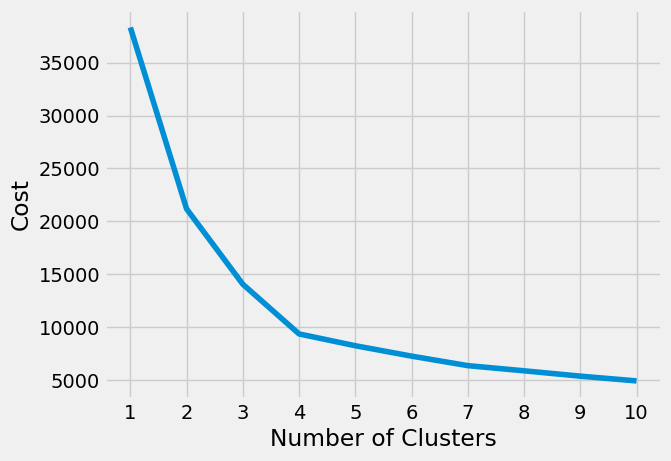

/tmp/ipykernel_3322428/2213764647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1["kmeans"] = km_labels


In [13]:
km_labels = my_kmeans(cluster_data1)
cluster_result1["kmeans"] = km_labels

In [14]:
cluster_result1["kmeans"].value_counts()

kmeans
1    2619
3    2514
0    1395
2    1112
Name: count, dtype: int64

In [15]:
silhouette_score(cluster_data1,km_labels)

0.5079267303301789

### affinity propogation

In [ ]:
for i in range(100):
    af = AffinityPropagation(preference=i*(-1), random_state=0).fit(cluster_data1)
    cluster_centers_indices = af.cluster_centers_indices_
    af_labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)
    if n_clusters_<= 1:
        print(i*(-1), "Estimated number of clusters: %d" % n_clusters_)
    else:
        print(i*(-1), "Estimated number of clusters: %d" % n_clusters_, silhouette_score(cluster_data1,af_labels))

In [9]:
af = AffinityPropagation(preference=-6, random_state=0).fit(cluster_data1)
cluster_centers_indices = af.cluster_centers_indices_
af_labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
cluster_result1["af"] = af_labels
print("Estimated number of clusters: %d" % n_clusters_,silhouette_score(cluster_data1,af_labels))

/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/tmp/ipykernel_2585852/417809601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1["af"] = af_labels


Estimated number of clusters: 5455 0.0079712595020135


In [10]:
print(davies_bouldin_score(cluster_data1,cluster_result1['af']),calinski_harabasz_score(cluster_data1,cluster_result1['af']))

0.3722638477526126 812.1102165568788


### means shift

In [104]:
for i in [x*0.1 for x in range(1,11)]:
    bandwidth = estimate_bandwidth(cluster_data1, quantile=i, n_samples=500)
    
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(cluster_data1)
    ms_labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    labels_unique = np.unique(ms_labels)
    n_clusters_ = len(labels_unique)
    
    if n_clusters_<= 1:
        print(i, "Estimated number of clusters: %d" % n_clusters_)
    else:
        print(i, "Estimated number of clusters: %d" % n_clusters_, silhouette_score(cluster_data1,ms_labels))

0.1 Estimated number of clusters: 15 0.40875805806441
0.2 Estimated number of clusters: 4 0.5030415788409371
0.30000000000000004 Estimated number of clusters: 2 0.4672807686363391
0.4 Estimated number of clusters: 1
0.5 Estimated number of clusters: 1
0.6000000000000001 Estimated number of clusters: 1
0.7000000000000001 Estimated number of clusters: 1
0.8 Estimated number of clusters: 1
0.9 Estimated number of clusters: 1
1.0 Estimated number of clusters: 1


In [105]:
for i in [1000,800, 500, 100, 90, 80, 60, 50, 40, 30, 20]:
    bandwidth = estimate_bandwidth(cluster_data1, quantile=0.2, n_samples=i)
    
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(cluster_data1)
    ms_labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    labels_unique = np.unique(ms_labels)
    n_clusters_ = len(labels_unique)
    
    if n_clusters_<= 1:
        print(i, "Estimated number of clusters: %d" % n_clusters_)
    else:
        print(i, "Estimated number of clusters: %d" % n_clusters_, silhouette_score(cluster_data1,ms_labels))

1000 Estimated number of clusters: 4 0.5088667771408603
800 Estimated number of clusters: 4 0.5030415788409371
500 Estimated number of clusters: 4 0.5030415788409371
100 Estimated number of clusters: 4 0.5067658508067513
90 Estimated number of clusters: 4 0.5088667771408603
80 Estimated number of clusters: 4 0.5063084621918955
60 Estimated number of clusters: 4 0.5059885880536068
50 Estimated number of clusters: 4 0.507301166010428
40 Estimated number of clusters: 5 0.46128848113898013
30 Estimated number of clusters: 6 0.44121023462047293
20 Estimated number of clusters: 4 0.5045468083445759


In [106]:
bandwidth = estimate_bandwidth(cluster_data1, quantile=0.2, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(cluster_data1)
ms_labels = ms.labels_
cluster_result1['ms'] = ms_labels
silhouette_score(cluster_data1,ms_labels)

/tmp/ipykernel_1152417/3851236127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1['ms'] = ms_labels


0.5088667771408603

### spectral clustering

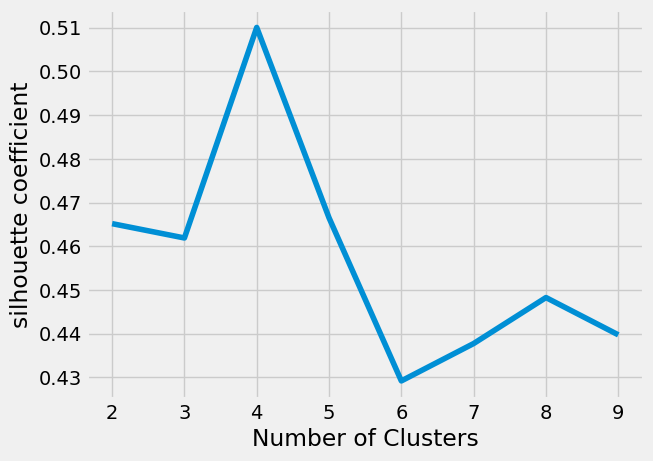

In [18]:
sc_labels = my_SpectralClustering(cluster_data1)

In [8]:
sc = SpectralClustering(n_clusters=4,assign_labels='cluster_qr',random_state=0).fit(cluster_data1)
sc_labels = sc.labels_
cluster_result1["sc"] = sc_labels
silhouette_score(cluster_data1,sc_labels)

/tmp/ipykernel_3342357/4280995741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1["sc"] = sc_labels


0.5100596670295525

### hierarchical clustering

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

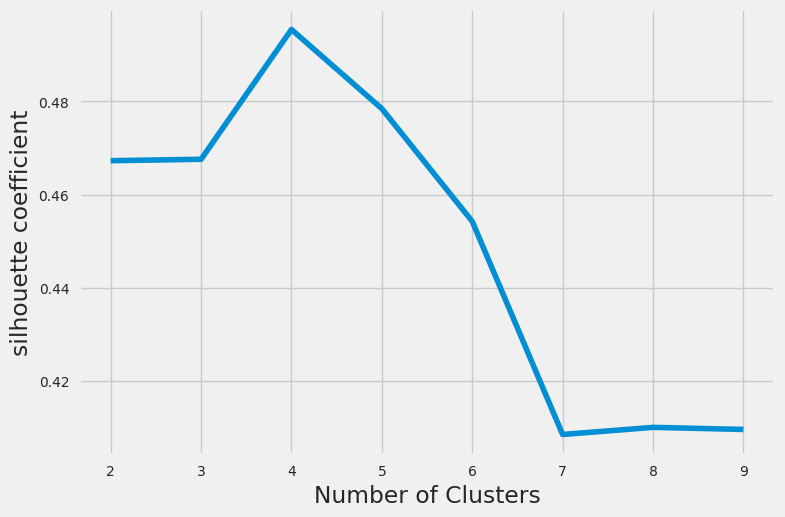

In [109]:
hc_labels = my_HierarchicalClustering(cluster_data1,"ward")

In [110]:
hc = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(cluster_data1)
hc_labels = hc.labels_
labels_unique = np.unique(hc_labels)
n_clusters_ = len(labels_unique)

cluster_result1["hc"] = hc_labels
print("number of estimated clusters : %d" % n_clusters_, silhouette_score(cluster_data1,hc_labels))

/tmp/ipykernel_1152417/2976429268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1["hc"] = hc_labels


number of estimated clusters : 4 0.49542162956080293


### dbscan

In [111]:
for i in [0.1*x for x in range(1,10)]:
    dbscan = DBSCAN(eps=i,min_samples=50).fit(cluster_data1)
    db_labels = dbscan.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise_ = list(db_labels).count(-1)

    print(i,"Estimated number of clusters: %d" % n_clusters_)
    print(i,"Estimated number of noise points: %d" % n_noise_)
    print(silhouette_score(cluster_data1,db_labels))


0.1 Estimated number of clusters: 44
0.1 Estimated number of noise points: 996


0.783044296720685
0.2 Estimated number of clusters: 44
0.2 Estimated number of noise points: 996
0.783044296720685
0.30000000000000004 Estimated number of clusters: 44
0.30000000000000004 Estimated number of noise points: 996
0.783044296720685
0.4 Estimated number of clusters: 44
0.4 Estimated number of noise points: 996
0.783044296720685
0.5 Estimated number of clusters: 44
0.5 Estimated number of noise points: 996
0.783044296720685
0.6000000000000001 Estimated number of clusters: 44
0.6000000000000001 Estimated number of noise points: 996
0.783044296720685
0.7000000000000001 Estimated number of clusters: 44
0.7000000000000001 Estimated number of noise points: 996
0.783044296720685
0.8 Estimated number of clusters: 44
0.8 Estimated number of noise points: 996
0.783044296720685
0.9 Estimated number of clusters: 44
0.9 Estimated number of noise points: 996
0.783044296720685


In [112]:
for n in range(1,500,10):   
    dbscan = DBSCAN(eps=0.1,min_samples=n).fit(cluster_data1)
    db_labels = dbscan.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise_ = list(db_labels).count(-1)
    #if n_clusters_ < 10:
    print(n)
    print(n,"Estimated number of clusters: %d" % n_clusters_)
    print(n, "Estimated number of noise points: %d" % n_noise_)
    print(silhouette_score(cluster_data1,db_labels))

1
1 Estimated number of clusters: 114
1 Estimated number of noise points: 0


0.9985602094240837
11
11 Estimated number of clusters: 80
11 Estimated number of noise points: 105
0.9766710113571453
21
21 Estimated number of clusters: 65
21 Estimated number of noise points: 330
0.9274871954631602
31
31 Estimated number of clusters: 55
31 Estimated number of noise points: 580
0.8721965122372175
41
41 Estimated number of clusters: 46
41 Estimated number of noise points: 901
0.8033634236779408
51
51 Estimated number of clusters: 42
51 Estimated number of noise points: 1096
0.761802052974672
61
61 Estimated number of clusters: 32
61 Estimated number of noise points: 1654
0.6455143138953404
71
71 Estimated number of clusters: 27
71 Estimated number of noise points: 1978
0.581211340256612
81
81 Estimated number of clusters: 19
81 Estimated number of noise points: 2582
0.48587926348056715
91
91 Estimated number of clusters: 18
91 Estimated number of noise points: 2671
0.4662613117593977
101
101 Estimated number of clusters: 16
101 Estimated number of noise points: 2868
0.

In [113]:
dbscan = DBSCAN(eps=0.1,min_samples=111).fit(cluster_data1)
db_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)
#if n_clusters_ < 10:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(silhouette_score(cluster_data1,db_labels))
cluster_result1["dbscan"] = db_labels

Estimated number of clusters: 13
Estimated number of noise points: 3189


0.3634720979770233


/tmp/ipykernel_1152417/247385239.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1["dbscan"] = db_labels


### optics

In [115]:
for i in [5000, 4000, 3000, 2000, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 150, 100, 90, 80, 60, 50, 40, 30, 20, 10,9,8,7,6,5,4,3,2]:
    optics = OPTICS(eps=0.1,min_samples=i).fit(cluster_data1)
    optics_labels = optics.labels_
    
    labels_unique = np.unique(optics_labels)
    n_clusters_ = len(labels_unique)
    if n_clusters_ > 1:
        print(i,"number of estimated clusters : %d" % n_clusters_,silhouette_score(cluster_data1,optics_labels))
    else:
        print(i,"number of estimated clusters : %d" % n_clusters_)

5000 number of estimated clusters : 1
4000 number of estimated clusters : 1
3000 number of estimated clusters : 3 0.4005767038575898
2000 number of estimated clusters : 3 0.3656640404442387
1000 number of estimated clusters : 3 0.42569451545566606
900 number of estimated clusters : 3 0.3778082637089789


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


800 number of estimated clusters : 3 0.033115204958305736


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


700 number of estimated clusters : 3 0.031128839461424904


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


600 number of estimated clusters : 3 0.031128839461424904


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


500 number of estimated clusters : 3 0.017545535708750535


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


400 number of estimated clusters : 5 0.17047296616137936


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


300 number of estimated clusters : 6 0.20390925295945117


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


200 number of estimated clusters : 9 0.3179234720824784


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


150 number of estimated clusters : 12 0.31900247159845024


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


100 number of estimated clusters : 17 0.4241186387663003


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


90 number of estimated clusters : 19 0.4662613117593977


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


80 number of estimated clusters : 21 0.5045265249596882


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


60 number of estimated clusters : 34 0.657596423169391


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


50 number of estimated clusters : 45 0.783044296720685


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


40 number of estimated clusters : 48 0.8118830521435948


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


30 number of estimated clusters : 57 0.878924082806224


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


20 number of estimated clusters : 68 0.9362565427331975


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


10 number of estimated clusters : 81 0.9766710113571453


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


9 number of estimated clusters : 81 0.9766710113571453


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


8 number of estimated clusters : 82 0.978484136167792


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


7 number of estimated clusters : 84 0.9815491433950417


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


6 number of estimated clusters : 87 0.9854711993350694


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


5 number of estimated clusters : 90 0.9888487808951483


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


4 number of estimated clusters : 93 0.9915452191846132


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


3 number of estimated clusters : 98 0.9948505186568684


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


2 number of estimated clusters : 104 0.9975500155047563


In [116]:
for i in [x*0.1 for x in range(1,11)]:
    optics = OPTICS(eps=i,min_samples=1000).fit(cluster_data1)
    optics_labels = optics.labels_
    
    labels_unique = np.unique(optics_labels)
    n_clusters_ = len(labels_unique)
    
    if n_clusters_ > 1:
        print(i,"number of estimated clusters : %d" % n_clusters_,silhouette_score(cluster_data1,optics_labels))
    else:
        print(i,"number of estimated clusters : %d" % n_clusters_)

0.1 number of estimated clusters : 3 0.42569451545566606
0.2 number of estimated clusters : 3 0.42569451545566606
0.30000000000000004 number of estimated clusters : 3 0.42569451545566606
0.4 number of estimated clusters : 3 0.42569451545566606
0.5 number of estimated clusters : 3 0.42569451545566606
0.6000000000000001 number of estimated clusters : 3 0.42569451545566606
0.7000000000000001 number of estimated clusters : 3 0.42569451545566606
0.8 number of estimated clusters : 3 0.42569451545566606
0.9 number of estimated clusters : 3 0.42569451545566606
1.0 number of estimated clusters : 3 0.42569451545566606


In [117]:
optics = OPTICS(eps=0.1,min_samples=1000).fit(cluster_data1)
optics_labels = optics.labels_
labels_unique = np.unique(optics_labels)
n_clusters_ = len(labels_unique)
cluster_result1["optics"] = optics_labels
silhouette_score(cluster_data1,optics_labels)

/tmp/ipykernel_1152417/2769502561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1["optics"] = optics_labels


0.42569451545566606

### BIRCH

In [128]:
#for i in [5000, 4000, 3000, 2000, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 150, 100, 90, 80, 60, 50, 40, 30, 20, 10,9,8,7,6,5,4,3,2]:
for k in range(2,11):
    brc = Birch(threshold=2.0, branching_factor=500, n_clusters=k).fit(np.ascontiguousarray(cluster_data1))
    brc_labels = brc.labels_
    
    labels_unique = np.unique(brc_labels)
    n_clusters_ = len(labels_unique)
    
    if n_clusters_ > 1:
        print(k,"number of estimated clusters : %d" % n_clusters_,silhouette_score(cluster_data1,brc_labels))
    else:
        print(k,"number of estimated clusters : %d" % n_clusters_)

2 number of estimated clusters : 2 0.4672807686363391
3 number of estimated clusters : 3 0.46109522080591303
4 number of estimated clusters : 4 0.4951453196115102
5 number of estimated clusters : 5 0.475954965158163
6 number of estimated clusters : 6 0.46572245344607477


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (6) by BIRCH is less than (7). Decrease the threshold.
  warnings.warn(


7 number of estimated clusters : 6 0.46572245344607477


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (6) by BIRCH is less than (8). Decrease the threshold.
  warnings.warn(


8 number of estimated clusters : 6 0.46572245344607477


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (6) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(


9 number of estimated clusters : 6 0.46572245344607477


/home/16jl93/.local/lib/python3.10/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (6) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


10 number of estimated clusters : 6 0.46572245344607477


In [129]:
brc = Birch(threshold=2, branching_factor=500, n_clusters=4).fit(np.ascontiguousarray(cluster_data1))
brc_labels = brc.labels_

labels_unique = np.unique(brc_labels)
n_clusters_ = len(labels_unique)

print(i, "number of estimated clusters : %d" % n_clusters_)
cluster_result1["birch"] = brc_labels

1.0 number of estimated clusters : 4


/tmp/ipykernel_1152417/1226070370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1["birch"] = brc_labels


In [130]:
cluster_result1

,Name,Project,kmeans,ms,sc,hc,dbscan,optics,birch
0,yongtang,tensorflow,3,2,1,0,-1,-1,0
1,gunan,tensorflow,3,2,1,0,-1,-1,0
2,mihaimaruseac,tensorflow,0,3,0,1,-1,-1,1
3,caisq,tensorflow,0,3,0,1,-1,-1,1
4,mrry,tensorflow,0,3,0,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...
7635,kpengboy,mxnet,1,1,3,3,7,1,3
7636,chrisdubois,mxnet,1,1,3,3,-1,1,3
7637,austingg,mxnet,1,1,3,3,7,1,3
7638,loveisp,mxnet,2,0,2,2,11,0,2


In [131]:
for alg in ['kmeans',	'ms',	'sc',	'hc',	'dbscan',	'optics',	'birch']:
    print(alg, len(cluster_result1[alg].value_counts()), 
          silhouette_score(cluster_data1,cluster_result1[alg]))

kmeans 4 0.5067656487990898 0.8597697060405227 7855.333638347033


ms 4 0.5088667771408603 0.8424443993808268 7796.884429471033
sc 4 0.5098258299401642 0.8536101125374973 7742.758450968818
hc 4 0.49542162956080293 0.9083692328265531 7310.145876464665
dbscan 14 0.3634720979770233 1.030621213632007 769.6845688016867
optics 3 0.42569451545566606 0.9631811489648245 5381.25051746364
birch 4 0.4951453196115102 0.9008491590146055 7401.88989001847


## Clustering Results - Profile

In [9]:
cluster_result1.loc[cluster_result1['sc']==0, 'profile'] = 'ca'
cluster_result1.loc[cluster_result1['sc']==1, 'profile'] = 'cw'
cluster_result1.loc[cluster_result1['sc']==2, 'profile'] = 'pa'
cluster_result1.loc[cluster_result1['sc']==3, 'profile'] = 'pw'

/tmp/ipykernel_3342357/3602804558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result1.loc[cluster_result1['sc']==0, 'profile'] = 'ca'


In [10]:
developer_data['profile'] = cluster_result1['profile']

In [53]:
cluster_result1['profile'].value_counts()

profile
pw    2765
pa    2456
cw    1249
ca    1170
Name: count, dtype: int64

In [51]:
log_data = developer_data[['Project','profile']]
log_data['Total Commits'] = developer_data['Total Commits'].apply(lambda x:np.log(x+1))
log_data['Code Contribution Density'] = developer_data['Code Contribution Density'].apply(lambda x:np.log(x+1))

/tmp/ipykernel_3322428/224449959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data['Total Commits'] = developer_data['Total Commits'].apply(lambda x:np.log(x+1))
/tmp/ipykernel_3322428/224449959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data['Code Contribution Density'] = developer_data['Code Contribution Density'].apply(lambda x:np.log(x+1))


/tmp/ipykernel_3322428/2442943254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=developer_data, x='profile', y='Worktime',  ax=axs[0],cut=0, palette='Set2', order=['ca','cw','pa','pw'])
/tmp/ipykernel_3322428/2442943254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=log_data, x='profile', y='Total Commits',  ax=axs[1],cut=0, palette='Set2', order=['ca','cw','pa','pw'])
/tmp/ipykernel_3322428/2442943254.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=log_data, x='profile', y='Code Contribution Density', 

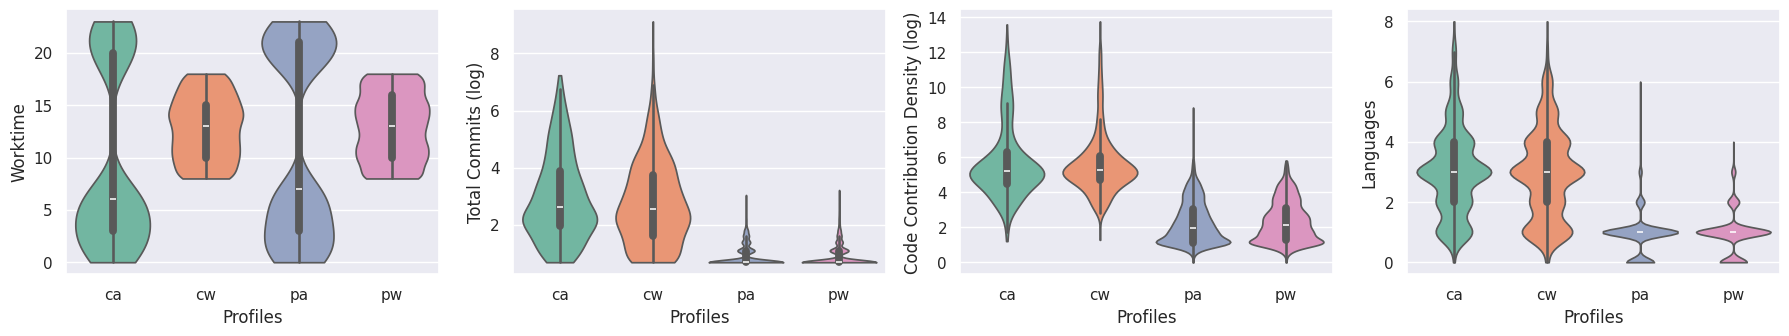

In [55]:
sns.set(rc={'figure.figsize': (19.7,3.27)})
fig, axs = plt.subplots(ncols=4)
sns.violinplot(data=developer_data, x='profile', y='Worktime',  ax=axs[0],cut=0, palette='Set2', order=['ca','cw','pa','pw'])
axs[0].set(xlabel='Profiles', ylabel='Worktime')
sns.violinplot(data=log_data, x='profile', y='Total Commits',  ax=axs[1],cut=0, palette='Set2', order=['ca','cw','pa','pw'])
axs[1].set(xlabel='Profiles', ylabel='Total Commits (log)')
sns.violinplot(data=log_data, x='profile', y='Code Contribution Density',  ax=axs[2],cut=0, palette='Set2', order=['ca','cw','pa','pw'])
axs[2].set(xlabel='Profiles', ylabel='Code Contribution Density (log)')
sns.violinplot(data=developer_data, x='profile', y='Languages',  ax=axs[3],cut=0, palette='Set2', order=['ca','cw','pa','pw'])
axs[3].set(xlabel='Profiles', ylabel='Languages')
plt.show()

/tmp/ipykernel_3322428/745581517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=log_data, x='profile', y='Total Commits',cut=0, palette='Set2', order=['ca','cw','pa','pw'])


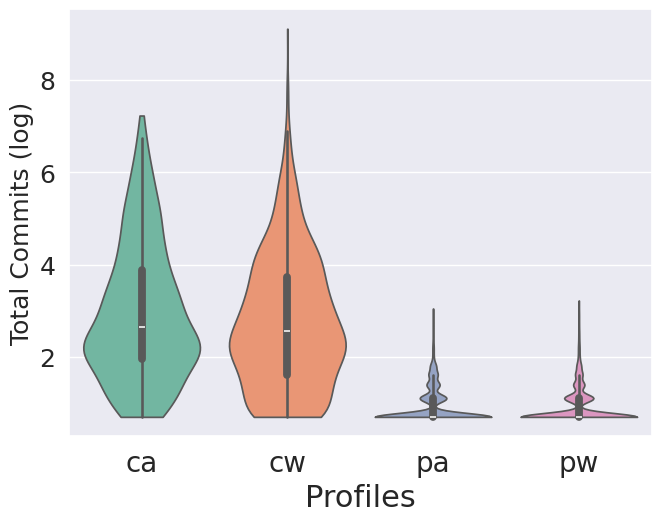

In [102]:
sns.set(rc={'figure.figsize': (6.7,5.27)})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=18) 
sns.violinplot(data=log_data, x='profile', y='Total Commits',cut=0, palette='Set2', order=['ca','cw','pa','pw'])
plt.xlabel("Profiles", fontsize=22)
plt.ylabel("Total Commits (log)", fontsize=18)
#plt.savefig(os.path.join(basedir,f"profile_commit.png"),dpi=300,bbox_inches='tight',facecolor='none')
plt.show()

/tmp/ipykernel_3322428/511420507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=log_data, x='profile', y='Code Contribution Density',cut=0, palette='Set2', order=['ca','cw','pa','pw'])


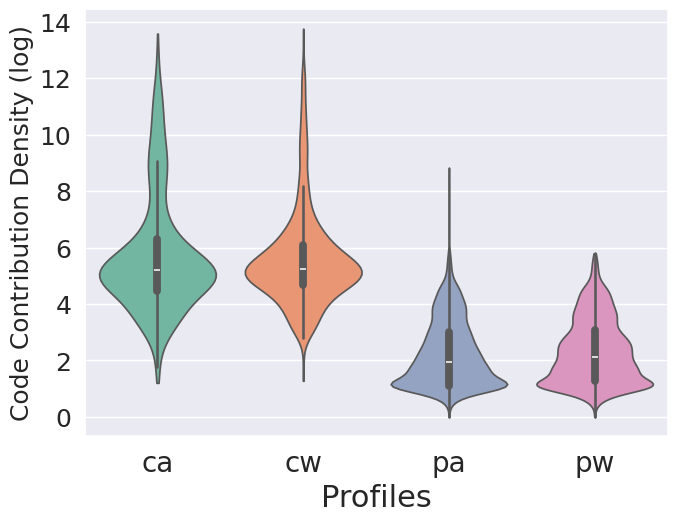

In [103]:
sns.set(rc={'figure.figsize': (6.7,5.27)})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=18) 
sns.violinplot(data=log_data, x='profile', y='Code Contribution Density',cut=0, palette='Set2', order=['ca','cw','pa','pw'])
plt.xlabel("Profiles", fontsize=22)
plt.ylabel("Code Contribution Density (log)", fontsize=18)
#plt.savefig(os.path.join(basedir,f"profile_code.png"),dpi=300,bbox_inches='tight',facecolor='none')
plt.show()

/tmp/ipykernel_3322428/3108434710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=developer_data, x='profile', y='Languages',cut=0, palette='Set2', order=['ca','cw','pa','pw'])


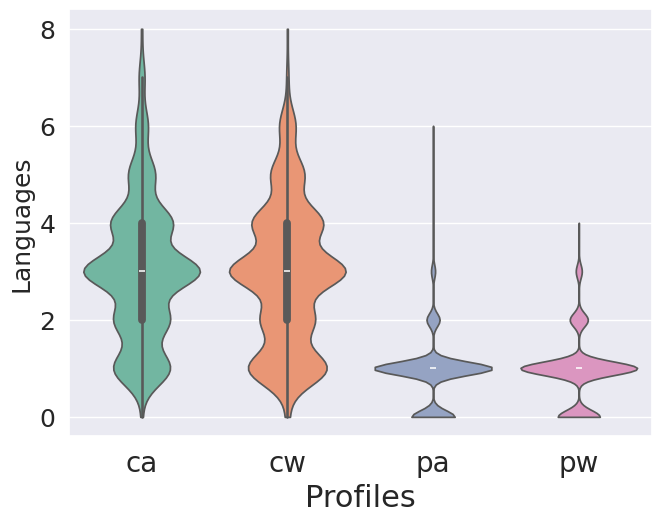

In [104]:
sns.set(rc={'figure.figsize': (6.7,5.27)})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=18) 
sns.violinplot(data=developer_data, x='profile', y='Languages',cut=0, palette='Set2', order=['ca','cw','pa','pw'])
plt.xlabel("Profiles", fontsize=22)
plt.ylabel("Languages", fontsize=18)
#plt.savefig(os.path.join(basedir,f"profile_language.png"),dpi=300,bbox_inches='tight',facecolor='none')
plt.show()

/tmp/ipykernel_3322428/2822863570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=developer_data, x='profile', y='Worktime',cut=0, palette='Set2', order=['ca','cw','pa','pw'])


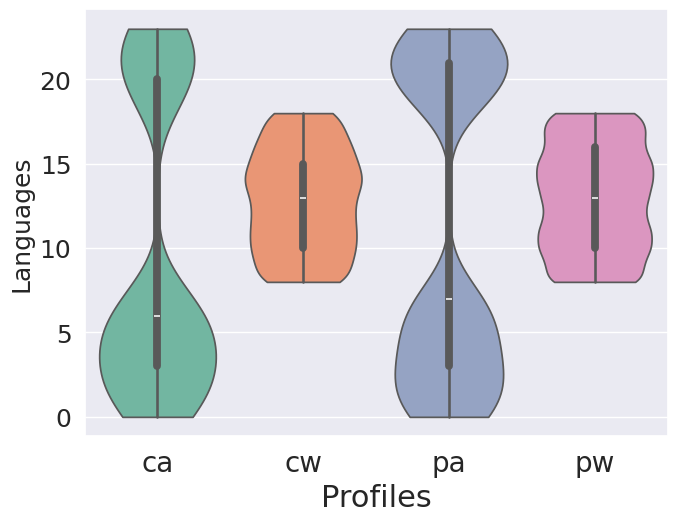

In [105]:
sns.set(rc={'figure.figsize': (6.7,5.27)})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=18) 
sns.violinplot(data=developer_data, x='profile', y='Worktime',cut=0, palette='Set2', order=['ca','cw','pa','pw'])
plt.xlabel("Profiles", fontsize=22)
plt.ylabel("Languages", fontsize=18)
#plt.savefig(os.path.join(basedir,f"profile_worktime.png"),dpi=300,bbox_inches='tight',facecolor='none')
plt.show()

## Add a column 'profile' to contributor_features.csv

In [11]:
developer_data.to_csv(os.path.join(basedir, "contributor_features.csv"))